## MultiClass Classification on (Iris Data set)

In [25]:
from warnings import filterwarnings
filterwarnings("ignore")

### Read the data Set

In [26]:
import pandas as pd
df=pd.read_csv("iris (1).csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Check the missing values and null values

In [28]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### seperate X and Y

In [29]:
x=df.drop(columns=["species"])
y=df[["species"]]

In [30]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [32]:
import numpy as np

In [33]:
np.unique(y)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Preprocessing for Y

In [42]:
Y_encoded=pd.get_dummies(y,columns=["species"])
Y_encoded

,species_setosa,species_versicolor,species_virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


### Create a Preprocessing pipeline for X

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [45]:

num_pipeline=Pipeline(steps=[("impute",SimpleImputer(strategy="median")),
                             ("scaler",StandardScaler())])

In [47]:
X_pre=num_pipeline.fit_transform(x)
X_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [48]:
cols=num_pipeline.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [49]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y_encoded,test_size=0.2,random_state=42)

In [52]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
22,-1.506521,1.249201,-1.567576,-1.315444
15,-0.173674,3.090775,-1.283389,-1.052180
65,1.038005,0.098217,0.364896,0.264142
11,-1.264185,0.788808,-1.226552,-1.315444
42,-1.748856,0.328414,-1.397064,-1.315444


In [53]:
ytrain[0:5]

,species_setosa,species_versicolor,species_virginica
22,True,False,False
15,True,False,False
65,False,True,False
11,True,False,False
42,True,False,False


In [57]:
ytrain.shape

(120, 3)

In [58]:
xtrain.shape

(120, 4)

### Start buildinng the keras model

In [59]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [60]:
model=Sequential()

# hidden layer 1 with input dims
model.add(Dense(64,activation="relu",input_dim=xtrain.shape[1]))
#dropout layer1
model.add(Dropout(0.3))

# hidden layer 2
model.add(Dense(32,activation="relu"))
#dropout layer2
model.add(Dropout(0.2))

# output layer contains number of classes as output
model.add(Dense(3,activation="softmax"))

### Compile the model

In [61]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy","AUC"])

### callback

In [62]:
callback=EarlyStopping(monitor="val_loss",patience=10)

### fitting Model

In [63]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=200,callbacks=[callback])

Epoch 1/200
3/3 [==============================] - 1s 118ms/step - loss: 1.1595 - accuracy: 0.3125 - auc: 0.4567 - val_loss: 1.1159 - val_accuracy: 0.3333 - val_auc: 0.4553
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 1.1097 - accuracy: 0.3646 - auc: 0.5269 - val_loss: 1.0588 - val_accuracy: 0.4583 - val_auc: 0.6879
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 1.0590 - accuracy: 0.4062 - auc: 0.6085 - val_loss: 1.0031 - val_accuracy: 0.7500 - val_auc: 0.8780
Epoch 4/200
3/3 [==============================] - 0s 14ms/step - loss: 0.9842 - accuracy: 0.5625 - auc: 0.7565 - val_loss: 0.9524 - val_accuracy: 0.9167 - val_auc: 0.9466
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 0.9484 - accuracy: 0.6667 - auc: 0.8099 - val_loss: 0.9035 - val_accuracy: 0.8750 - val_auc: 0.9679
Epoch 6/200
3/3 [==============================] - 0s 15ms/step - loss: 0.8893 - accuracy: 0.6979 - auc: 0.8666 - val_loss: 0.8565 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

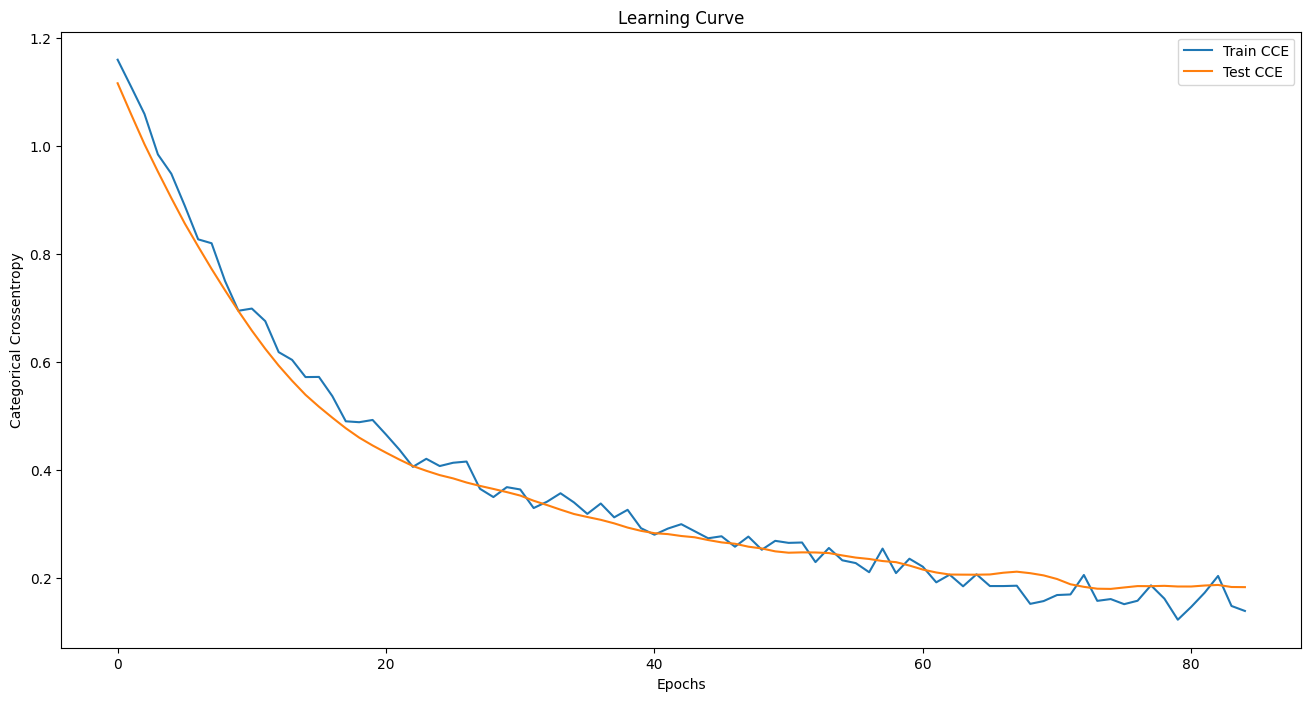

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history["loss"],label="Train CCE")
plt.plot(hist.history["val_loss"],label="Test CCE")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy")
plt.title("Learning Curve")
plt.legend()
plt.show

### Evaluation Model in train and test

In [65]:
model.evaluate(xtrain,ytrain)

4/4 [==============================] - 0s 3ms/step - loss: 0.1251 - accuracy: 0.9583 - auc: 0.9967


[0.12513406574726105, 0.9583333134651184, 0.9966840744018555]

In [66]:
model.evaluate(xtest, ytest)

1/1 [==============================] - 0s 23ms/step - loss: 0.0805 - accuracy: 1.0000 - auc: 1.0000


[0.08046094328165054, 1.0, 1.0]